<h1>NUMBER PLATE RECOGNITION</h1>

<h4>DOWNLOAD LIBRARIES</h4>

In [2]:
%pip install "ultralytics<=8.3.40" supervision roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 117.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.5/112.6 GB disk)


In [4]:
!pip install roboflow

<h4>IMPORT DATASET FROM ROBOFLOW</h4>

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(11)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Recognition-11 in yolov11:: 100%|██████████| 20262/20262 [00:03<00:00, 6539.03it/s]


<h4>MODEL TRAINING</h4>

epochs = 50 \
batch size = 16

In [6]:
!yolo task=detect mode=train model=yolo11n.pt data=/content/License-Plate-Recognition-11/data.yaml \
    epochs=50 batch=16 imgsz=640 plots=True

100% 5.35M/5.35M [00:00<00:00, 94.1MB/s]
New https://pypi.org/project/ultralytics/8.3.170 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/License-Plate-Recognition-11/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes

<h4>MODEL VALIDATION</h4>

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt \
    data=/content/License-Plate-Recognition-11/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/License-Plate-Recognition-11/valid/labels.cache... 2048 images, 3 backgrounds, 0 corrupt: 100% 2048/2048 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 128/128 [00:17<00:00,  7.39it/s]
                   all       2048       2195      0.983      0.946      0.974      0.716
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


<h4>EVALUATION METRICS</h4>
<h5>CONFUSION MATRIX</h5>

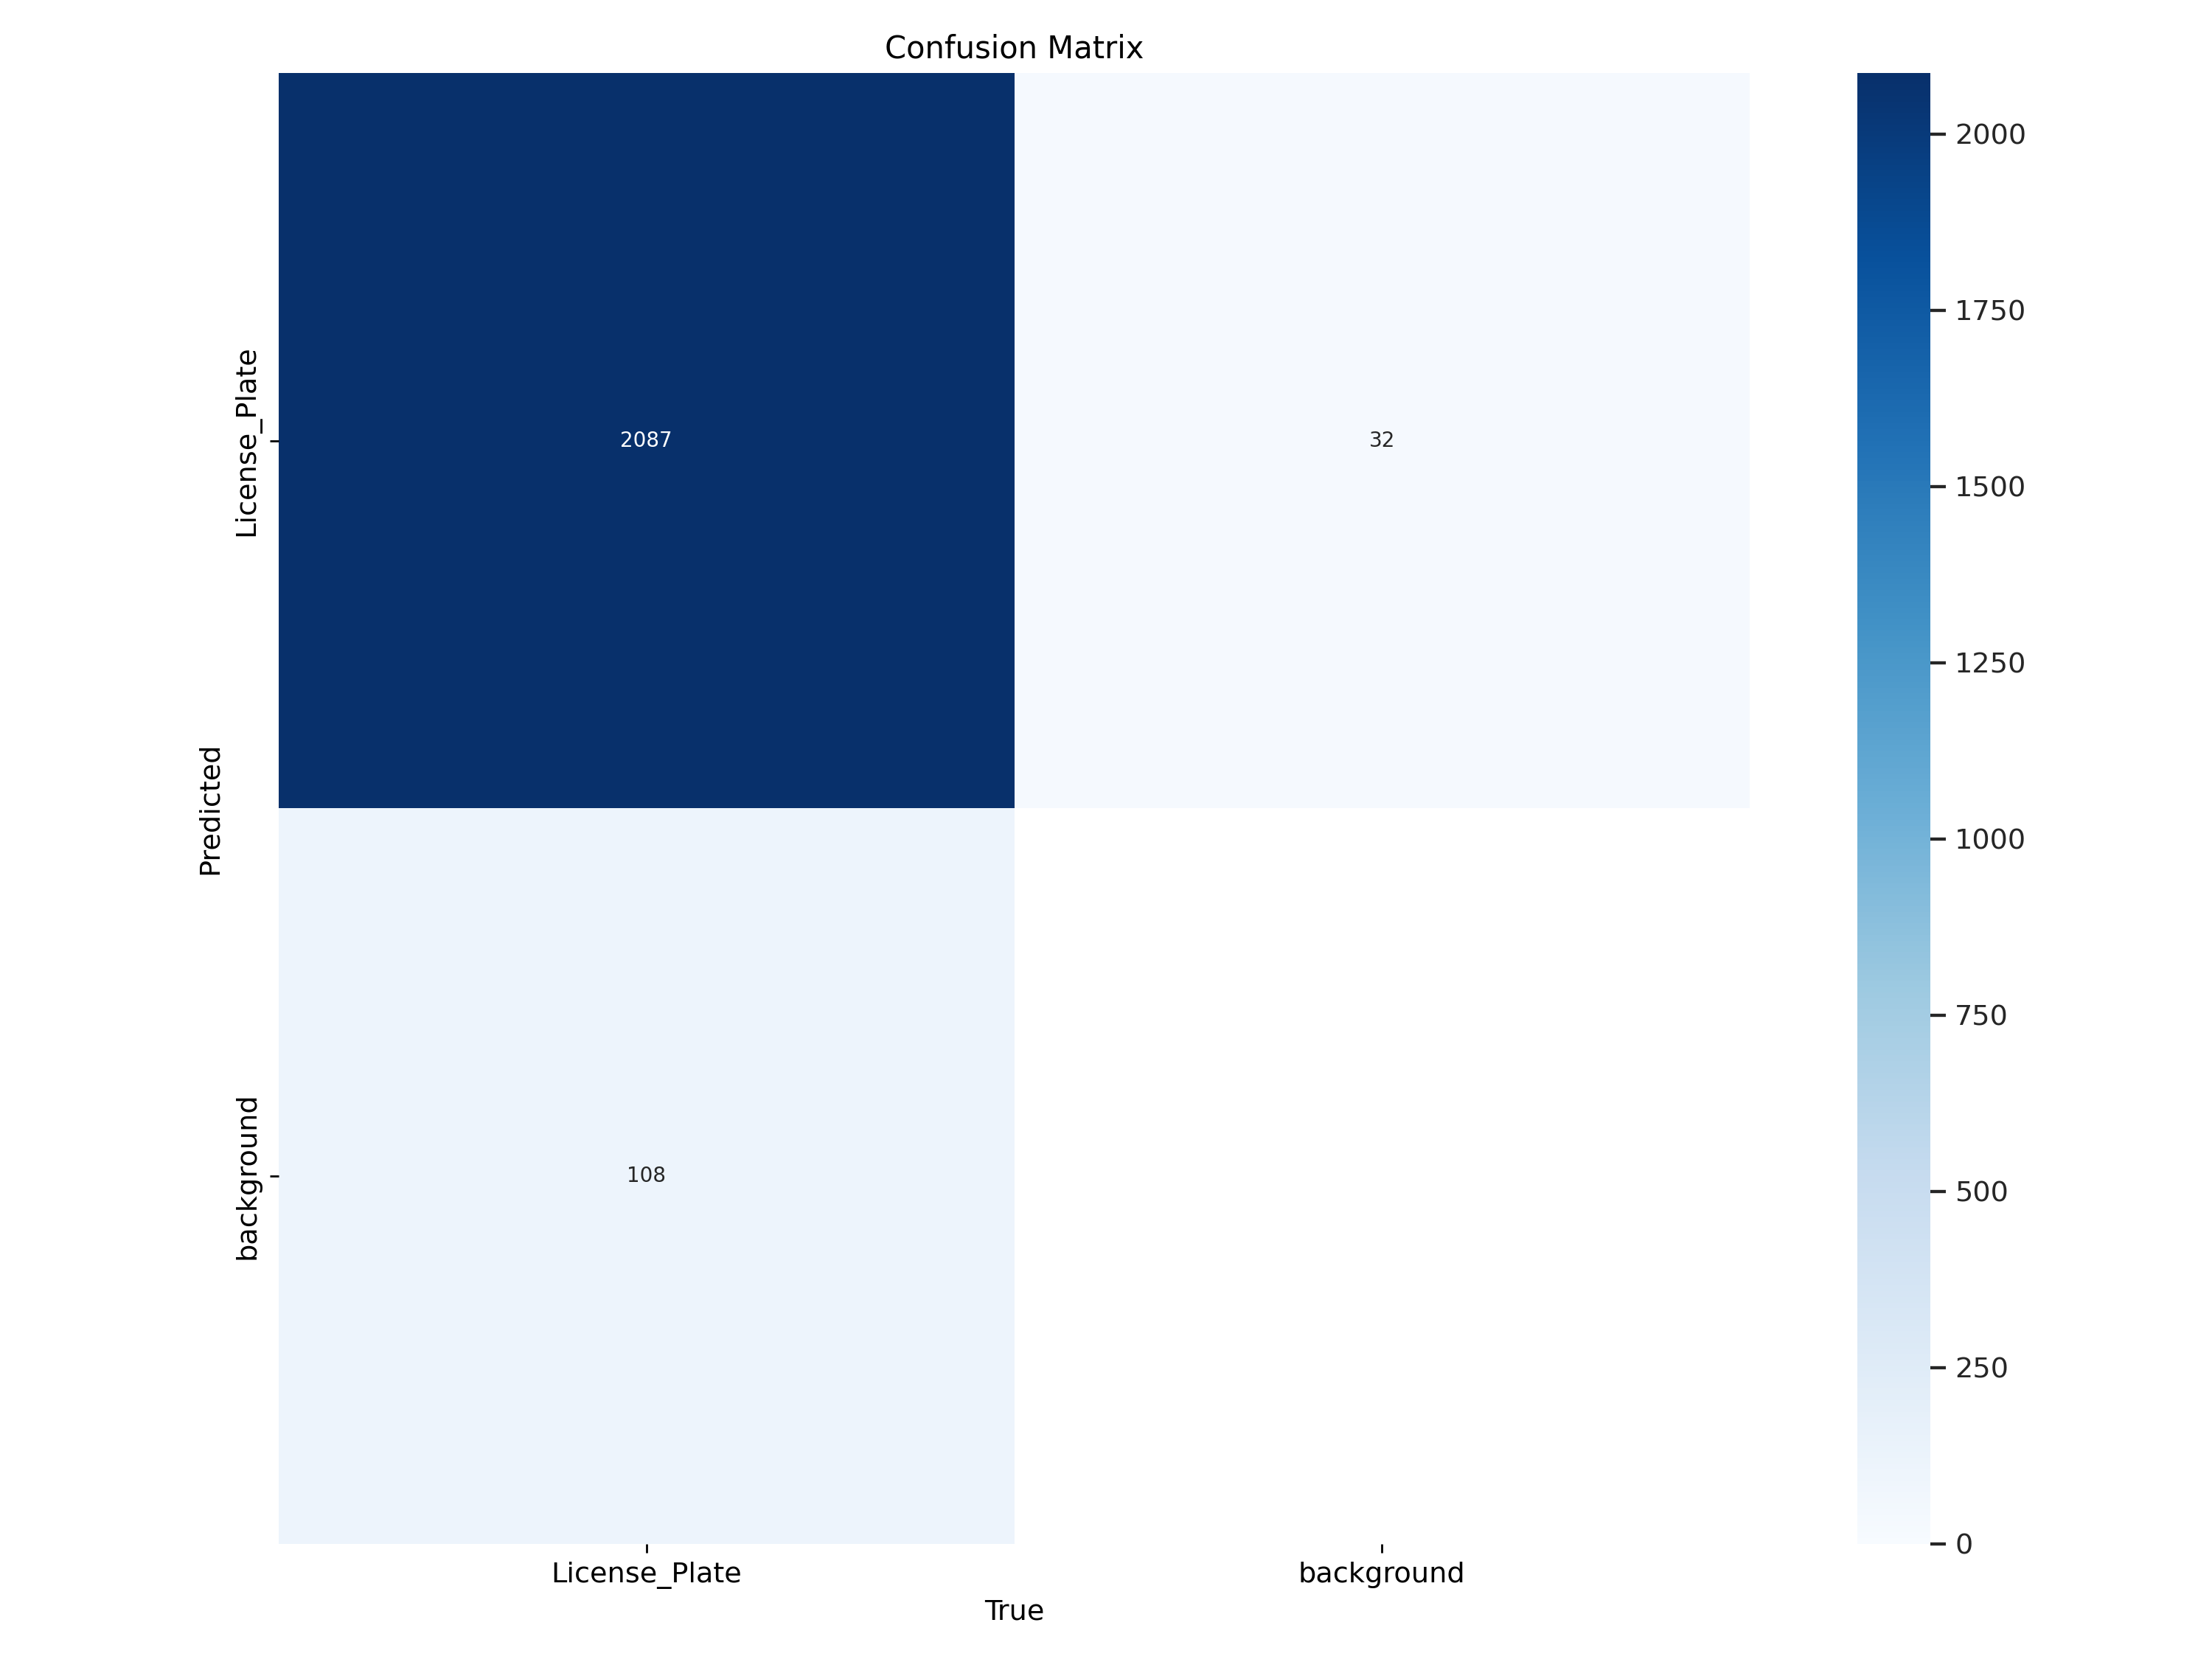

In [ ]:
from IPython.display import Image

Image(filename="/content/runs/detect/train/confusion_matrix.png", width=600)

<h5>LOSS AND PERFORMANCE CURVES</h5>

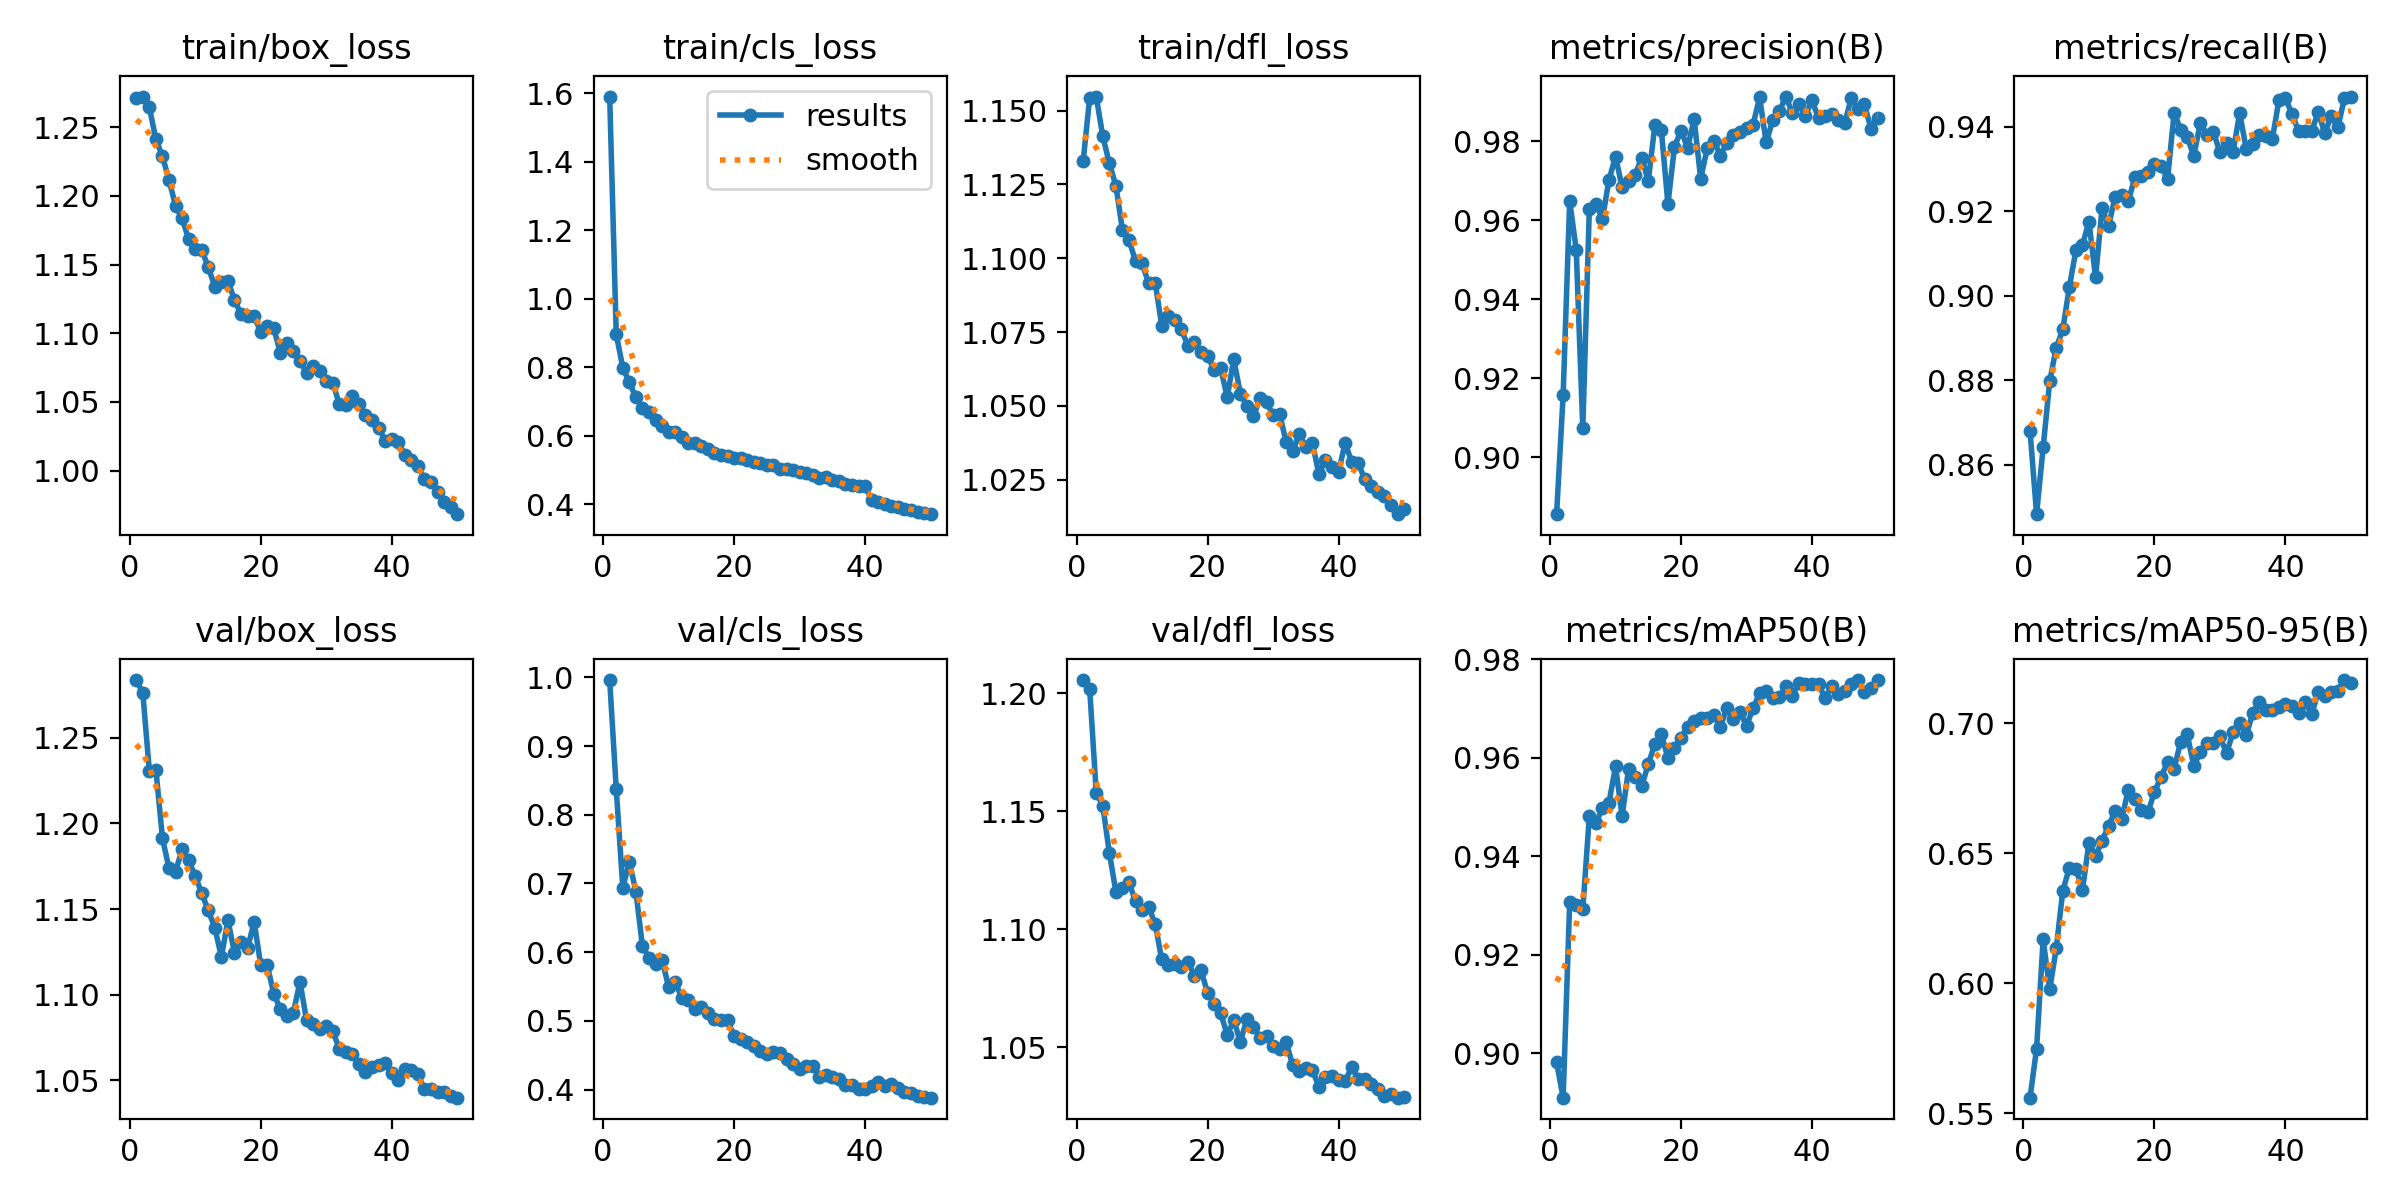

In [ ]:
Image(filename="/content/runs/detect/train/results.png", width=800)

<h4>MODEL TESTING</h4>

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/License-Plate-Recognition-11/test/images

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/1020 /content/License-Plate-Recognition-11/test/images/0002a5b67e5f0909_jpg.rf.c8f81ef986e3e99af6f349c200080453.jpg: 480x640 2 License_Plates, 73.6ms
image 2/1020 /content/License-Plate-Recognition-11/test/images/000812dcf304a8e7_jpg.rf.ba32e6c184b3d974abcced6f7c29af6d.jpg: 576x640 1 License_Plate, 63.4ms
image 3/1020 /content/License-Plate-Recognition-11/test/images/0010f4c10f7ab07e_jpg.rf.1844f6dde3b97ed1c762db933bbacaf3.jpg: 480x640 2 License_Plates, 11.1ms
image 4/1020 /content/License-Plate-Recognition-11/test/images/001cdd25e148cd36_jpg.rf.3921d4ff1d51af107666bc7ef7bd45b1.jpg: 480x640 1 License_Plate, 12.5ms
image 5/1020 /content/License-Plate-Recognition-11/test/images/002519f868563098_jpg.rf.29775b804909c1d042ce008c09f033e4.jpg: 448x640 1 License_Plate, 64.5ms
image 6/1020 /content/License-Plate-Recognition

<h4>DISPLAY PREDICTED IMAGES</h4>

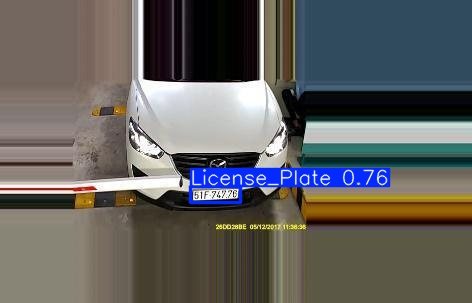

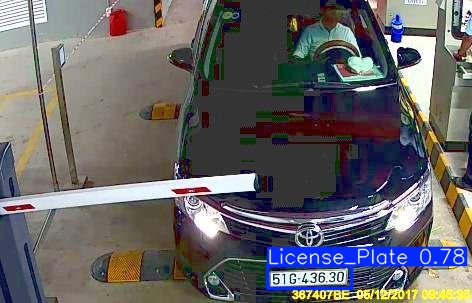

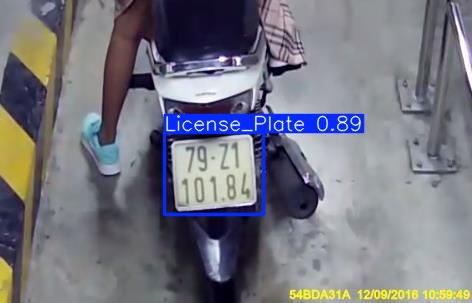

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = '/content/runs/detect/predict/'
image_files = glob.glob(os.path.join(latest_folder, '*.jpg'))

for img_path in image_files[:3]:
    display(IPyImage(filename=img_path, width=600))
    print("\n")


<h4>DOWNLOAD THE MODEL</h4>

In [ ]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>